<a href="https://colab.research.google.com/github/JasmineSingh1/Supervised-Machine-Learning/blob/main/Logistic_regression_using_LogisticRegressionCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240522153528/customer_churn_dataset-training-master%5B1%5D.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [6]:
df.shape

(440833, 12)

In [7]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [8]:
print(df['Churn'].unique())

[ 1.  0. nan]


In [9]:
print("Number of rows with missing Churn:", df['Churn'].isna().sum())

Number of rows with missing Churn: 1


In [10]:
print(df[df['Churn'].isna()])

        CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN  


In [11]:
df = df.dropna(how = 'all')

In [12]:
print(df.shape)

(440832, 12)


In [13]:
print("Number of rows with missing Churn:", df['Churn'].isna().sum())

Number of rows with missing Churn: 0


In [14]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [15]:
columns = df.columns
columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [16]:
for column in columns:
  print(f'{column} has these unique values: {df[column].unique()}\n\n')

CustomerID has these unique values: [2.00000e+00 3.00000e+00 4.00000e+00 ... 4.49997e+05 4.49998e+05
 4.49999e+05]


Age has these unique values: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62.]


Gender has these unique values: ['Female' 'Male']


Tenure has these unique values: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36.]


Usage Frequency has these unique values: [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10.]


Support Calls has these unique values: [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8.]


Payment Delay has these unique values: [18.  8.  7. 26. 16. 15.  4. 11. 

In [17]:
print(df['Gender'].unique())

['Female' 'Male']


In [18]:
# Using label encoding on Gender column; assigning the labels to Male and Female
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [19]:
print(df['Gender'].unique())

[1 0]


In [20]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,1,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,1,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,1,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,0,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,0,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [21]:
# One-hot encode 'Subscription Type' and 'Contract Length'
df = pd.get_dummies(df, columns=['Subscription Type', 'Contract Length'], drop_first=True)


In [22]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,1,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,True,False,False
1,3.0,65.0,1,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,False,True,False
2,4.0,55.0,1,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,False,False,True
3,5.0,58.0,0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,True,False
4,6.0,23.0,0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,False,False,True,False


In [23]:
# splitting into input features and target variable
X = df.drop(['Churn', 'CustomerID'], axis = 1)
y = df['Churn']
# CustomerID is usually just a unique value (e.g., C0001234)- It doesn’t represent any behavior, demographic, or metric related to churn, so we drop it. Including it would be like giving each person a "name" and expecting that to predict churn

In [24]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,1,39.0,14.0,5.0,18.0,932.00,17.0,False,True,False,False
1,65.0,1,49.0,1.0,10.0,8.0,557.00,6.0,False,False,True,False
2,55.0,1,14.0,4.0,6.0,18.0,185.00,3.0,False,False,False,True
3,58.0,0,38.0,21.0,7.0,7.0,396.00,29.0,False,True,True,False
4,23.0,0,32.0,20.0,5.0,8.0,617.00,20.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,0,54.0,15.0,1.0,3.0,716.38,8.0,True,False,False,False
440829,25.0,1,8.0,13.0,1.0,20.0,745.38,2.0,True,False,False,False
440830,26.0,0,35.0,27.0,1.0,5.0,977.31,9.0,False,True,False,True
440831,28.0,0,55.0,14.0,2.0,0.0,602.55,2.0,False,True,False,True


In [25]:
y

,Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
440828,0.0
440829,0.0
440830,0.0
440831,0.0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [28]:
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")

X train shape: (308582, 12)
y train shape: (308582,)


In [29]:
from sklearn.linear_model import LogisticRegressionCV

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# LogisticRegressionCV with 5-fold CV
model_cv = LogisticRegressionCV(
    cv=5,
    max_iter=1000,
    scoring='accuracy',  # or 'roc_auc' if class imbalance matters
    penalty='l2',        # or 'l1' if using solver='saga'
    solver='lbfgs',      # 'saga' supports l1, 'lbfgs' supports l2
    random_state=42
)


In [33]:
model_cv.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=42, scoring='accuracy')

In [34]:
y_predictions = model_cv.predict(X_test_scaled)

In [35]:
y_predictions

array([1., 1., 0., ..., 1., 0., 1.])

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print("Confusion Matrix")
print(confusion_matrix(y_true = y_test, y_pred = y_predictions))
print("\n\nClassification Report")
print(classification_report(y_true = y_test, y_pred = y_predictions))

Confusion Matrix
[[51902  5258]
 [ 8521 66569]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     57160
         1.0       0.93      0.89      0.91     75090

    accuracy                           0.90    132250
   macro avg       0.89      0.90      0.89    132250
weighted avg       0.90      0.90      0.90    132250



In [39]:
print("Best C (inverse of regularization strength):", model_cv.C_)

Best C (inverse of regularization strength): [0.35938137]


In [51]:
# accuracy score
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_pred = y_predictions, y_true=y_test)
print(f"Accuracy score is: {score}")

Accuracy score is: 0.8958109640831758


In [44]:
# EDA
# Keep only numeric columns (excluding CustomerID if it's still there)
numeric_df = df.select_dtypes(include=['number']).copy()


In [45]:
numeric_df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction',
       'Churn'],
      dtype='object')

In [46]:
# Drop 'CustomerID'
numeric_df = numeric_df.drop(columns=['CustomerID'], errors='ignore')

In [47]:
numeric_df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [48]:
# Ensure 'Churn' is in the DataFrame and is categorical
numeric_df['Churn'] = df['Churn'].astype('category')

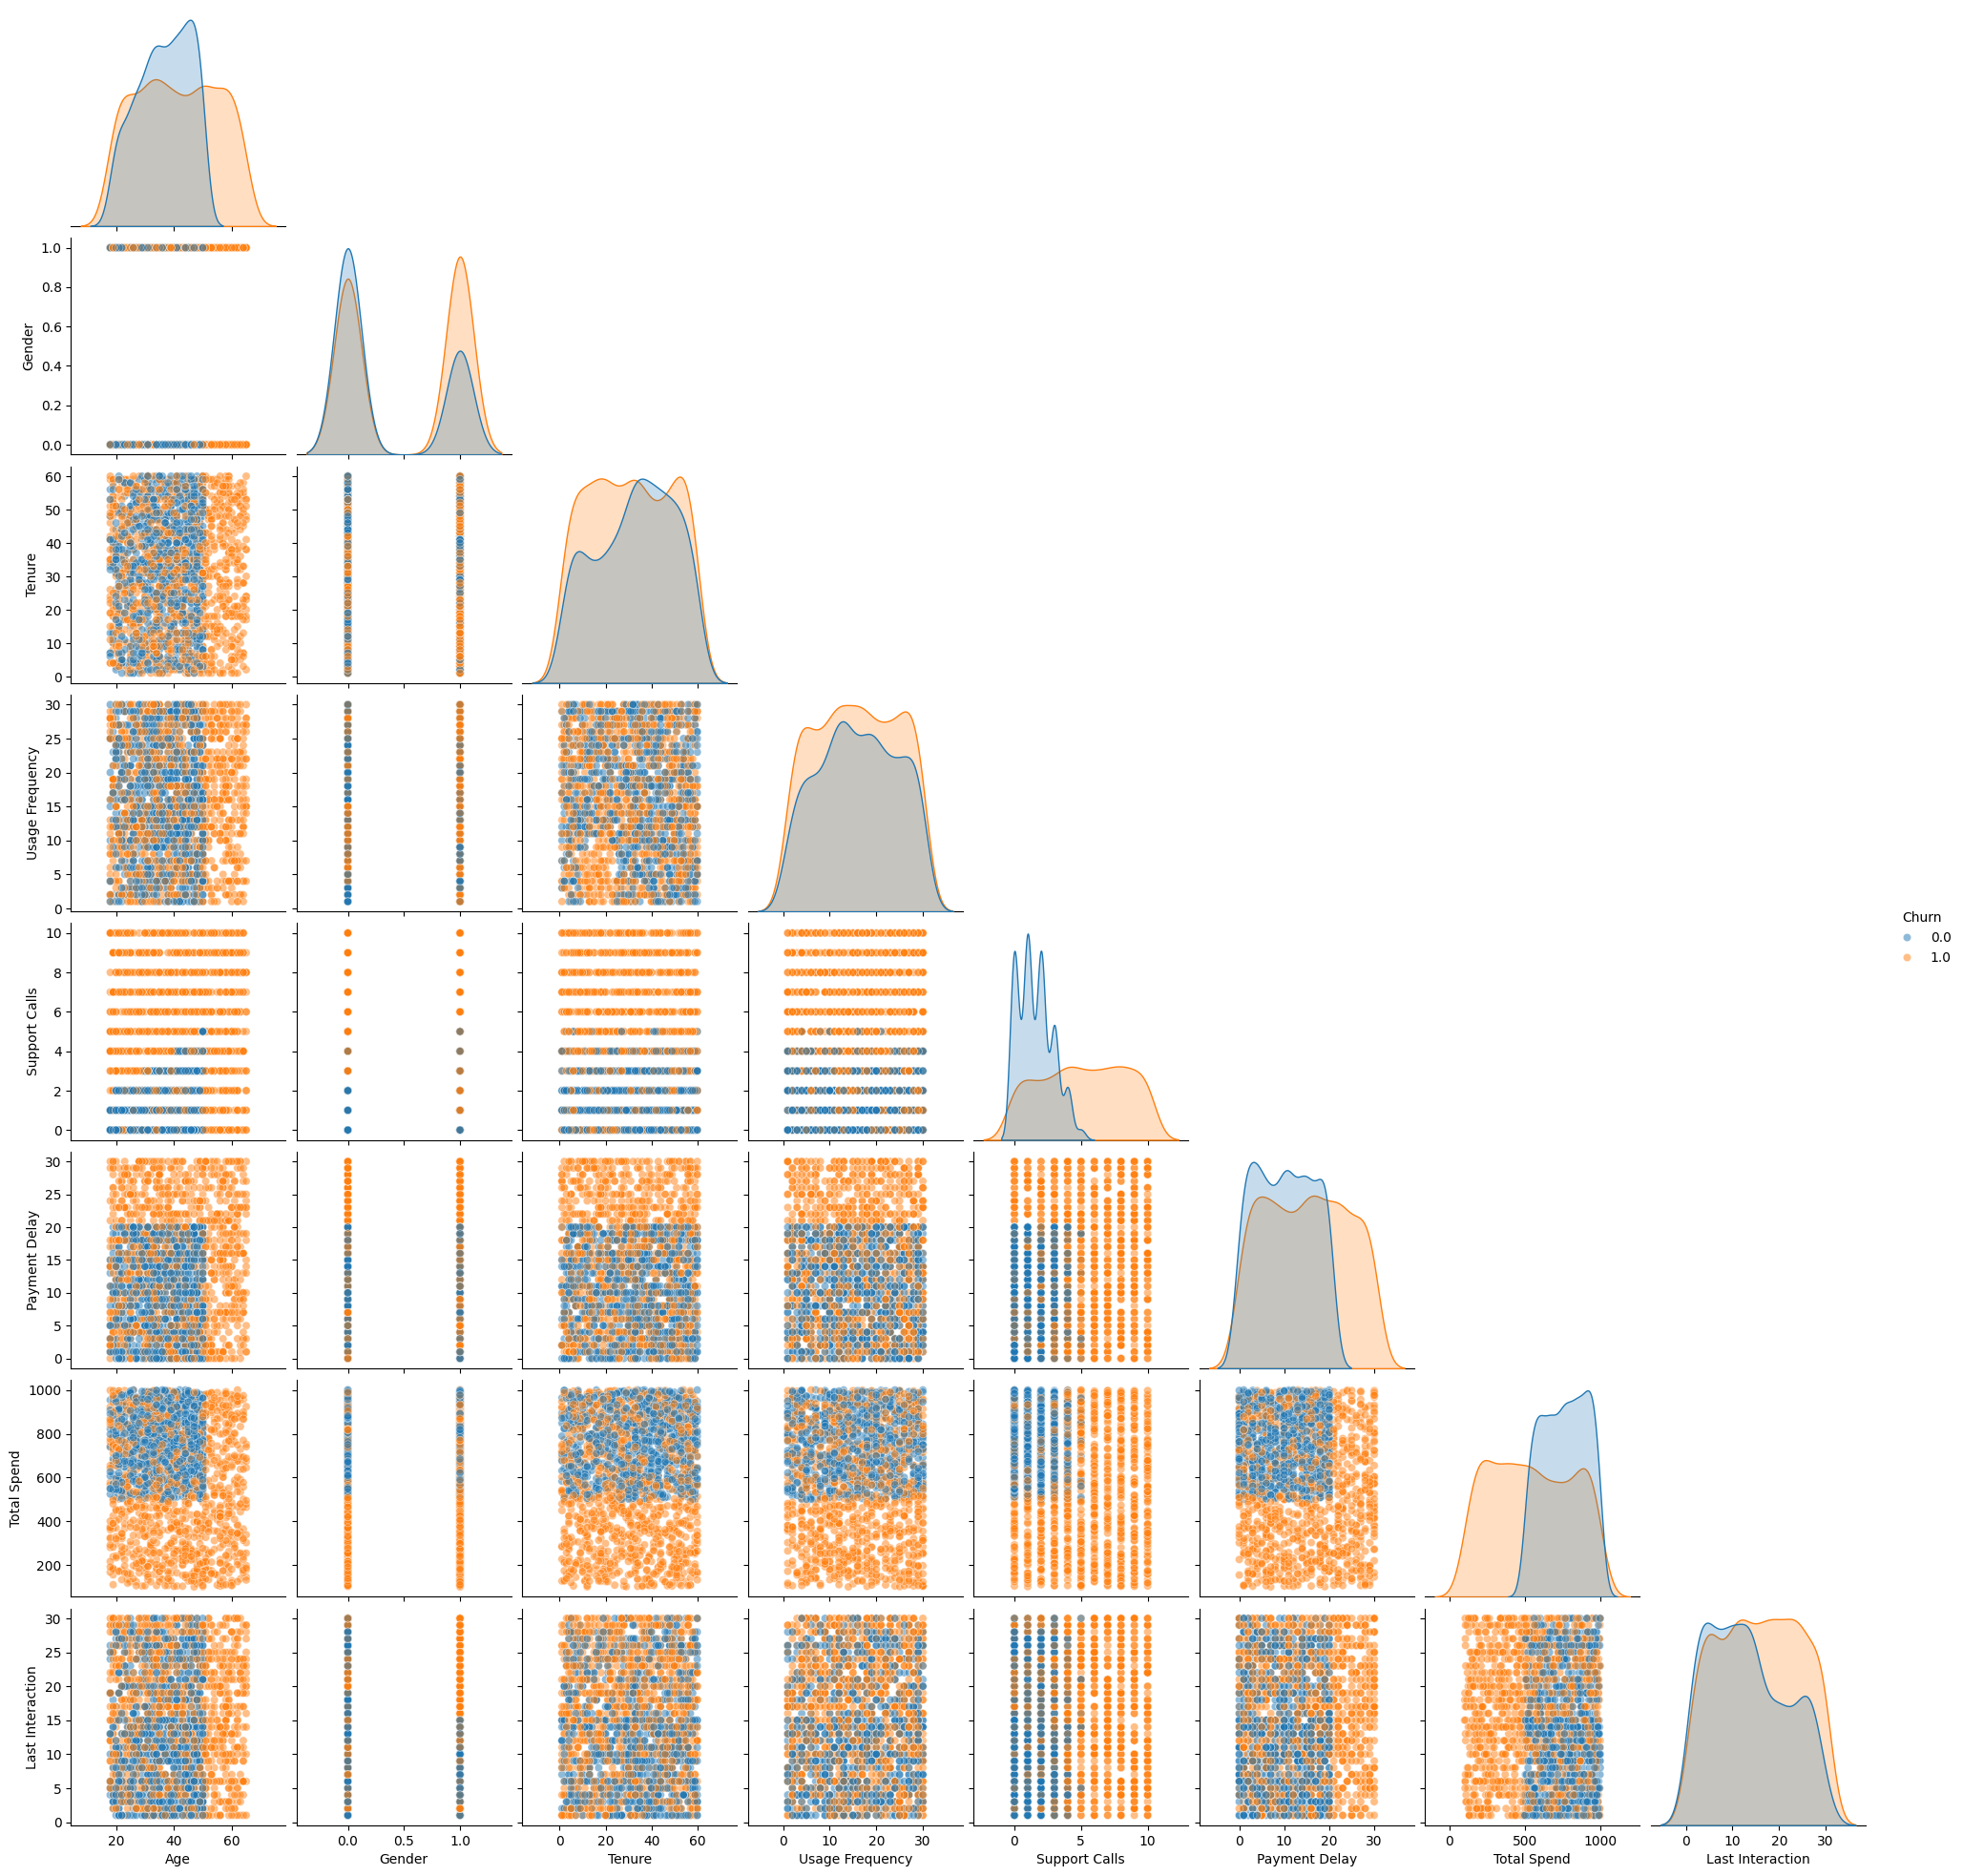

In [49]:
# Downsample the data, only if the dataset is large
sampled_df = numeric_df.sample(n=2000, random_state=42)

# Pairplot with Churn as hue
sns.pairplot(sampled_df, hue='Churn', corner=True, plot_kws={'alpha': 0.5})
plt.show()

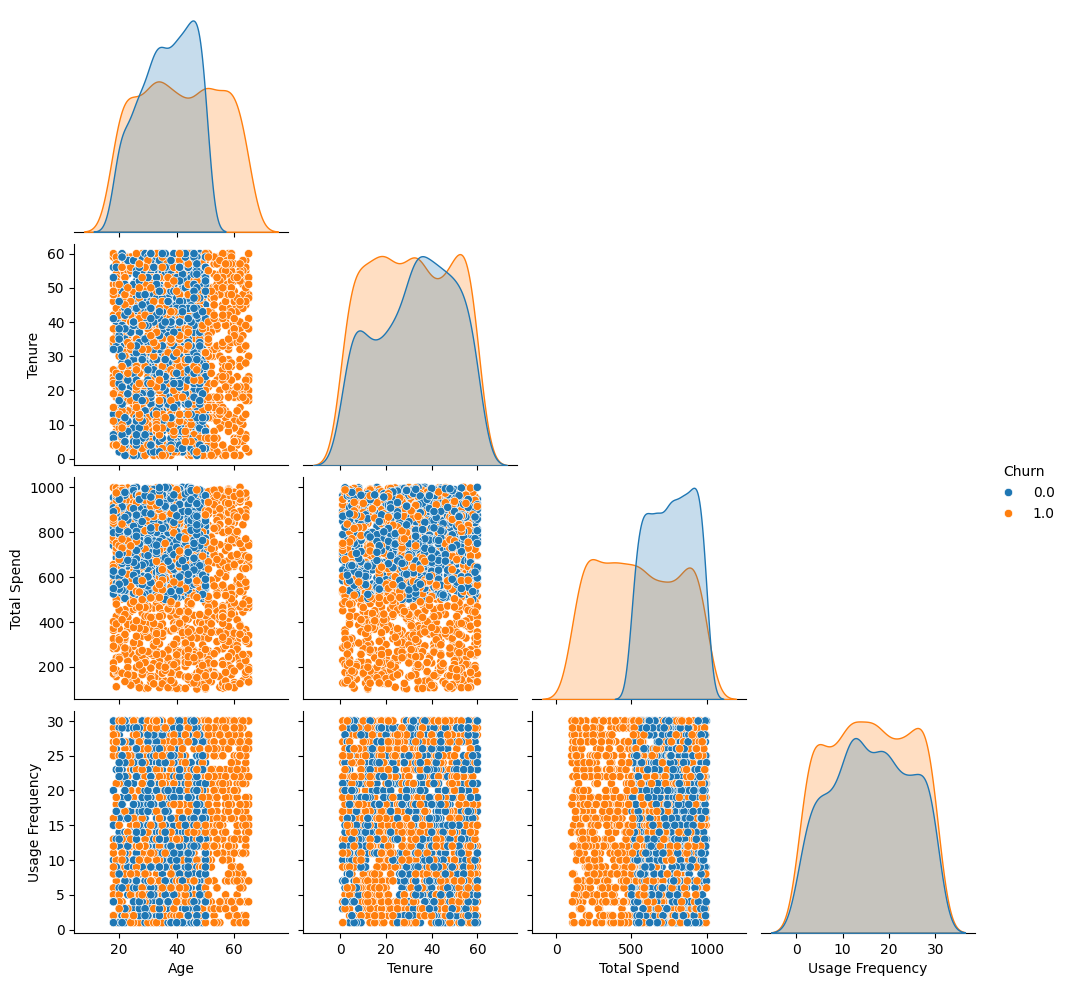

In [50]:
# Plotting only selected columns
columns_to_plot = ['Age', 'Tenure', 'Total Spend', 'Usage Frequency', 'Churn']
sampled_df = df[columns_to_plot].sample(n=2000, random_state=42)
sampled_df['Churn'] = sampled_df['Churn'].astype('category')

sns.pairplot(sampled_df, hue='Churn', corner=True)
plt.show()

Plotting ROC curve + AUC

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score


In [53]:
# Get predicted probabilities for class 1 (churn)
y_probs = model_cv.predict_proba(X_test_scaled)[:, 1]  # probability of churn

In [54]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

In [55]:
print(f"AUC score is {auc_score}")

AUC score is 0.959402905223785


Plotting ROC curve using: plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
*   fpr = False Positive Rate on the x-axis
*   tpr = True Positive Rate (i.e., Recall) on the y-axis
*   label=f"..." adds a label to the line for the legend (including the AUC score rounded to 4 decimals)
*   color='blue' colors the ROC curve line


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
*   Draws a dashed diagonal line from (0,0) to (1,1)
*   This represents a random classifier — a baseline
*   If your ROC curve is above this line, your model is better than random


The final plot shows:
*   Blue curve: The model’s performance
*   Dashed line: What random guessing would look like
*   The further above the diagonal the ROC curve is, the better the model
*   The AUC score in the legend gives a single number summarizing this


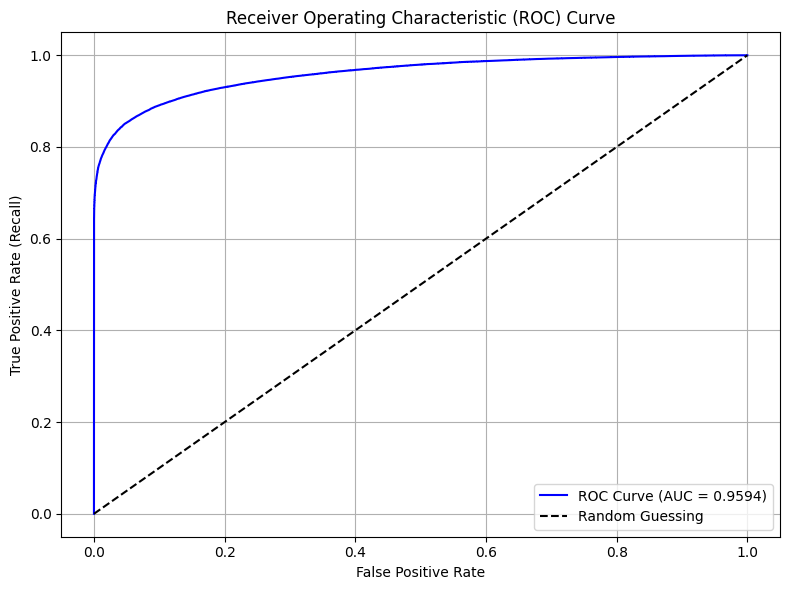

In [56]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()